# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

### Exercise 10.1

Choose **ONLY ONE** of the two following possibilities:

1. Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with (up to) 10 **parallel GA searches of the optimal path**:
each node should perform an independent GA search, the so-called *Continent*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.

2. Starting from your Genetic Algorithm code implement a **Parallel Tempering algorithm** (Simulated Annealing with many temperatures). Parallelize with MPI libraries your algorithm in order to solve the TSP where each computing node, up to 10, is characterized by a different temperature or a limited set of temperatures (if you need more than 10 temperatures). Use your genetic operators (except crossover) as trial moves for the Metropolis algorithm and **add a trial move that proposes an exchange of paths among adjacent temperatures (nodes)** (see lecture 8 for the acceptance formula). The candidate solution of the TSP will appear on the node with the lower temperature.

### <span style="color:green"> **OPZIONE 1**

<span style="color:green"> In entrambe le parallelizzazioni l'eseguibile utilizzato da ciascun nodo è l'algoritmo genetico dell'esercitazione 9.

#### <span style="color:green"> Parallelizzazione dell'algoritmo genetico **SENZA** scambio di informazione tra i nodi.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

In [44]:
L10 = np.loadtxt("Best_path_run_indip_0.txt")

In [45]:
L11 = np.loadtxt("Best_path_run_indip_1.txt")

In [46]:
L12 = np.loadtxt("Best_path_run_indip_2.txt")

In [47]:
L13 = np.loadtxt("Best_path_run_indip_3.txt")

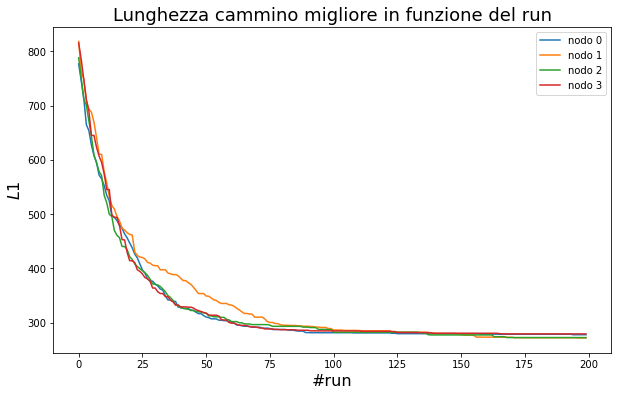

In [48]:
N=200
x=np.arange(N)

plt.figure(figsize = (10, 6))
plt.plot(x,L10, label='nodo 0')
plt.plot(x,L11, label='nodo 1')
plt.plot(x,L12, label='nodo 2')
plt.plot(x,L13, label='nodo 3')
plt.title("Lunghezza cammino migliore in funzione del run", fontsize=18)
plt.xlabel("#run", fontsize=16)
plt.ylabel("$L1$", fontsize=16)
plt.legend()
plt.show()

In [49]:
L10m = np.loadtxt("Best_path_medio_run_indip_0.txt")

In [50]:
L11m = np.loadtxt("Best_path_medio_run_indip_1.txt")

In [51]:
L12m = np.loadtxt("Best_path_medio_run_indip_2.txt")

In [52]:
L13m = np.loadtxt("Best_path_medio_run_indip_3.txt")

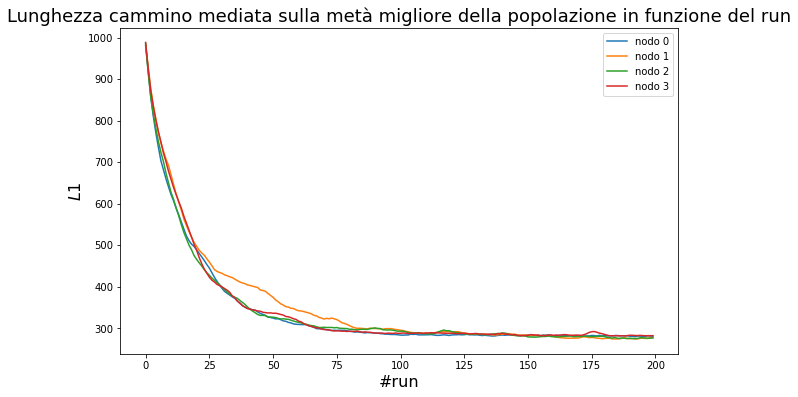

In [53]:
N=200
x=np.arange(N)

plt.figure(figsize = (10, 6))
plt.plot(x,L10m, label='nodo 0')
plt.plot(x,L11m, label='nodo 1')
plt.plot(x,L12m, label='nodo 2')
plt.plot(x,L13m, label='nodo 3')
plt.title("Lunghezza cammino mediata sulla metà migliore della popolazione in funzione del run", fontsize=18)
plt.xlabel("#run", fontsize=16)
plt.ylabel("$L1$", fontsize=16)
plt.legend()
plt.show()

In [54]:
x0,y0 = np.loadtxt("Best_path_finale_indip_0.txt", delimiter=' ', usecols=(0,1), unpack='true')

In [55]:
x1,y1 = np.loadtxt("Best_path_finale_indip_1.txt", delimiter=' ', usecols=(0,1), unpack='true')

In [56]:
x2,y2 = np.loadtxt("Best_path_finale_indip_2.txt", delimiter=' ', usecols=(0,1), unpack='true')

In [57]:
x3,y3 = np.loadtxt("Best_path_finale_indip_3.txt", delimiter=' ', usecols=(0,1), unpack='true')

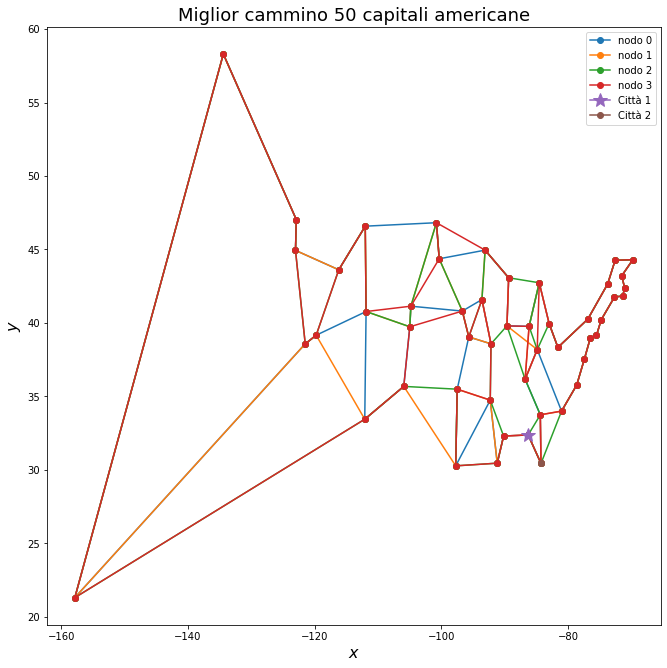

In [58]:
plt.figure(figsize = (11, 11))
plt.plot(x0,y0, marker='o', label='nodo 0')
plt.plot(x1,y1, marker='o', label='nodo 1')
plt.plot(x2,y2, marker='o', label='nodo 2')
plt.plot(x3,y3, marker='o', label='nodo 3')
plt.plot(-86.3006,32.3777, marker='*', markersize=15, label='Città 1')
plt.plot(-84.2813,30.4381, marker='o', label='Città 2')
plt.title("Miglior cammino 50 capitali americane", fontsize=18)
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.legend()
plt.show()

<span style="color:green"> In questo caso i tempi di esecuzione di 200 run per ciascuno dei 4 nodi indipendenti sono:
    
    rank 0, tempo = 88.1459
    rank 1, tempo = 89.5771
    rank 2, tempo = 90.1834
    rank 3, tempo = 88.4556
    

<span style="color:green"> I 4 migliori cammini trovati da ciascun nodo sono diversi tra loro e di lunghezza:
    
    rank 0, lunghezza = 277.661
    rank 1, lunghezza = 271.677
    rank 2, lunghezza = 272.402
    rank 3, lunghezza = 279.173
   
    

### Exercise 10.2

Apply your parallel code to the TSP problem for 50 american state-capitals longitude and latitude coordinates in the *American_capitals.dat* file.

If your choice in Exercise 10.1 is option 1, do you improve with respect using the same number of computing cores but with **independent GA searches** ?

If your choice in Exercise 10.1 is option 2, by using a number of temperatures equal to the number of individuals in your **non-parallel Genetic Algorithm code**, do you "improve" with respect to it?

#### <span style="color:green"> Parallelizzazione dell'algoritmo genetico **CON** scambio di informazione tra i nodi.

<span style="color:green"> Nella mia parallelizzazione l'unico vincolo è che il numero di nodi sia pari. Ogni 40 run eseguite da ciascun nodo, il nodo 0 genera una sequenza casuale di int da 0 al numero di nodi -1 e la trasmette agli altri nodi. Quando ciascun nodo trova se stesso nella sequenza, se l'indice della casella in cui si trova è pari, scambia il suo best path con il nodo nella casella dopo, se l'indice della casella in cui si trova è dispari, scambia il suo best path con il nodo nella casella prima di lui.

In [59]:
L10 = np.loadtxt("Best_path_run_0.txt")

In [60]:
L11 = np.loadtxt("Best_path_run_1.txt")

In [61]:
L12 = np.loadtxt("Best_path_run_2.txt")

In [62]:
L13 = np.loadtxt("Best_path_run_3.txt")

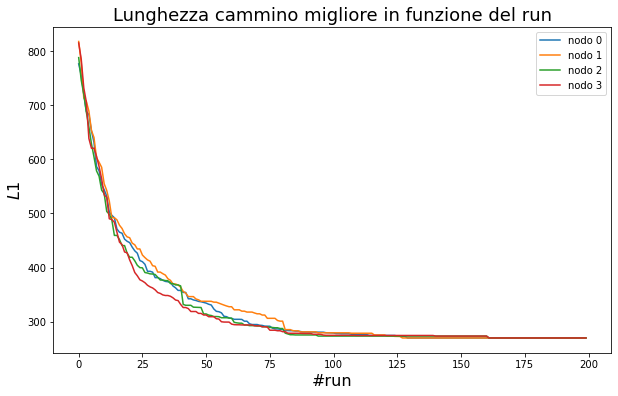

In [63]:
N=200
x=np.arange(N)

plt.figure(figsize = (10, 6))
plt.plot(x,L10, label='nodo 0')
plt.plot(x,L11, label='nodo 1')
plt.plot(x,L12, label='nodo 2')
plt.plot(x,L13, label='nodo 3')
plt.title("Lunghezza cammino migliore in funzione del run", fontsize=18)
plt.xlabel("#run", fontsize=16)
plt.ylabel("$L1$", fontsize=16)
plt.legend()
plt.show()

In [64]:
L10m = np.loadtxt("Best_path_medio_run_0.txt")

In [65]:
L11m = np.loadtxt("Best_path_medio_run_1.txt")

In [66]:
L12m = np.loadtxt("Best_path_medio_run_2.txt")

In [67]:
L13m = np.loadtxt("Best_path_medio_run_3.txt")

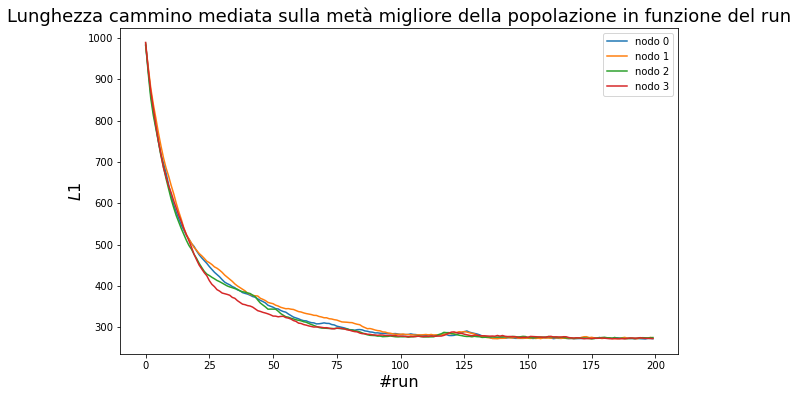

In [68]:
N=200
x=np.arange(N)

plt.figure(figsize = (10, 6))
plt.plot(x,L10m, label='nodo 0')
plt.plot(x,L11m, label='nodo 1')
plt.plot(x,L12m, label='nodo 2')
plt.plot(x,L13m, label='nodo 3')
plt.title("Lunghezza cammino mediata sulla metà migliore della popolazione in funzione del run", fontsize=18)
plt.xlabel("#run", fontsize=16)
plt.ylabel("$L1$", fontsize=16)
plt.legend()
plt.show()

In [69]:
x0,y0 = np.loadtxt("Best_path_finale_0.txt", delimiter=' ', usecols=(0,1), unpack='true')

In [70]:
x1,y1 = np.loadtxt("Best_path_finale_1.txt", delimiter=' ', usecols=(0,1), unpack='true')

In [71]:
x2,y2 = np.loadtxt("Best_path_finale_2.txt", delimiter=' ', usecols=(0,1), unpack='true')

In [72]:
x3,y3 = np.loadtxt("Best_path_finale_3.txt", delimiter=' ', usecols=(0,1), unpack='true')

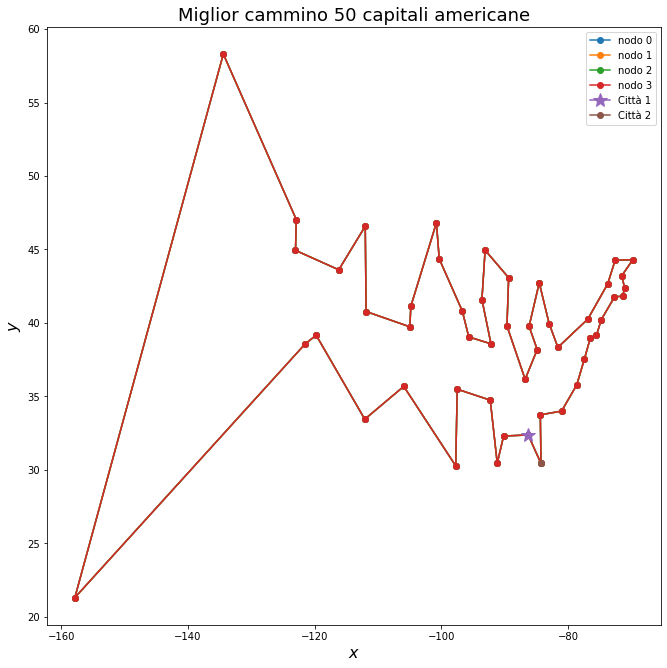

In [73]:
plt.figure(figsize = (11, 11))
plt.plot(x0,y0, marker='o', label='nodo 0')
plt.plot(x1,y1, marker='o', label='nodo 1')
plt.plot(x2,y2, marker='o', label='nodo 2')
plt.plot(x3,y3, marker='o', label='nodo 3')
plt.plot(-86.3006,32.3777, marker='*', markersize=15, label='Città 1')
plt.plot(-84.2813,30.4381, marker='o', label='Città 2')
plt.title("Miglior cammino 50 capitali americane", fontsize=18)
plt.xlabel("$x$", fontsize=16)
plt.ylabel("$y$", fontsize=16)
plt.legend()
plt.show()

<span style="color:green"> In questo caso i tempi di esecuzione di 200 run per ciascuno dei 4 nodi, avendo eseguito 5 scambi dei best delle popolazioni, sono:
    
    rank 0, tempo = 295.564
    rank 1, tempo = 293.783
    rank 2, tempo = 294.168
    rank 3, tempo = 298.766
    

<span style="color:green"> I 4 migliori cammini trovati da ciascun nodo sono uguali tra loro e di lunghezza 269.646.
Si vede quindi come la condivisione delle informazioni fra i nodi faccia aumentare i tempi di esecuzione (essendoci anche il tempo di trasmissione delle informazioni), ma porta tutti i nodi ad ottenere una soluzione migliore (in questo caso la stessa) a parità di run eseguite da ciascun nodo rispetto al caso indipendente, perchè di lunghezza minore rispetto alle 4 soluzioni trovate nel caso di nodi indipendenti.
Nel caso di nodi indipendenti servirebbero quindi più di 200 run per ottenere la soluzione trovata nel caso di nodi che scambiano informazione e questo compensa almeno in parte l'aumento dei tempi di esecuzione dovuti allo scambio di informazione (con 250 run almeno uno dei nodi raggiunge la soluzione di lunghezza 269.646 in un tempo pari a 98.8909).    